In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# load the test image using cv2 like pd.read_csv
#if any attribute of the object loaded is returning none it means the imae or the path is invalid!# 

In [2]:
img = cv2.imread("./TestImages/ConorMcGregor.png")
img.shape

(436, 600, 3)

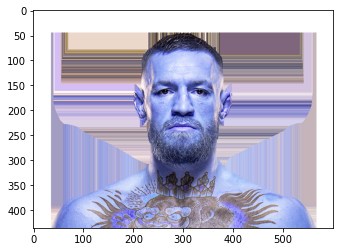

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(436, 600)

In [5]:
gray


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

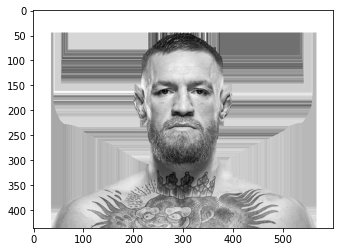

In [6]:
plt.imshow(gray, cmap = "gray")

# Face Detection Using Haar Cascade from Opencv
it used window like to detect you face ....e.g the eye area will appear darker while the nose tip will apper lighter
Notice that #GRAY is the object variable of the image

It return an array of 4 values which is x y width and height

In [7]:
face_cascade = cv2.CascadeClassifier('./OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./OpenCV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[209,  87, 182, 182]])

In [8]:
#Face is s two dimentional array so ..since its only one face it return the first faces....in theat manner

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(209, 87, 182, 182)

# To crop-draw("not really crooping just to markout the area") the face with red

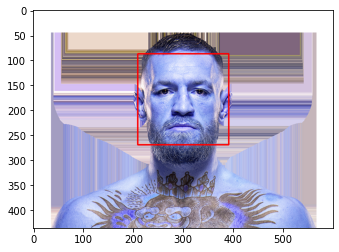

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

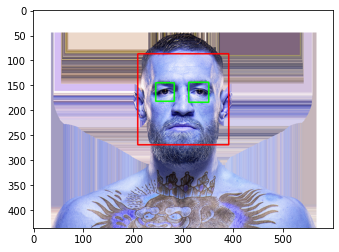

In [11]:
 cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [12]:
##Preprocessing: Crop the facial region of the image

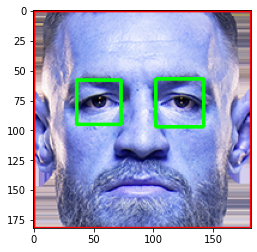

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
cropped_img = np.array(roi_color)
cropped_img.shape

(182, 182, 3)

# Preprocessing: Use wavelet transform as a feature for traning our model In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc Wavelet transform

In [15]:
# Wavelent Transformation helps to extract important features from a image

In [16]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

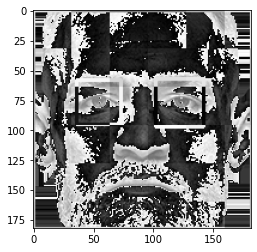

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

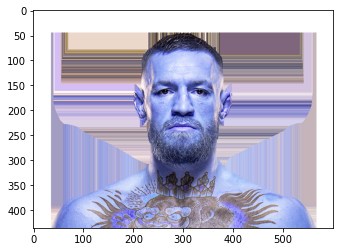

In [19]:
original_image = cv2.imread("./TestImages/ConorMcGregor.png")
plt.imshow(original_image)

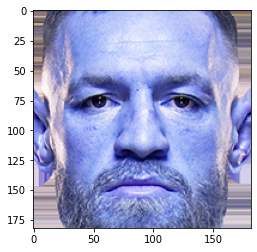

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./TestImages/ConorMcGregor.png')
plt.imshow(cropped_image)

TypeError: Image data of dtype object cannot be converted to float

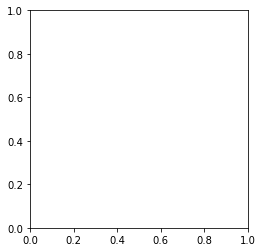

In [21]:
cropped_image = get_cropped_image_if_2_eyes('./TestImages/LionelMessi.jpg')
plt.imshow(cropped_image)

In [22]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [23]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./datasets/Adele',
 './datasets/Conor_Mcgregor',
 './datasets/James _Harden',
 './datasets/John_Cena',
 './datasets/Lionel_Messi']

# Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [25]:
# to create cropped file if it dosent exit
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
           # print("generating image ", entry,count)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datasets/cropped/Adele
Generating cropped images in folder:  ./datasets/cropped/Conor_Mcgregor
Generating cropped images in folder:  ./datasets/cropped/James _Harden
Generating cropped images in folder:  ./datasets/cropped/John_Cena
Generating cropped images in folder:  ./datasets/cropped/Lionel_Messi


In [27]:
celebrity_file_names_dict

{'Adele': ['./datasets/cropped/Adele/Adele1.png',
  './datasets/cropped/Adele/Adele2.png',
  './datasets/cropped/Adele/Adele3.png',
  './datasets/cropped/Adele/Adele4.png',
  './datasets/cropped/Adele/Adele5.png',
  './datasets/cropped/Adele/Adele6.png',
  './datasets/cropped/Adele/Adele7.png',
  './datasets/cropped/Adele/Adele8.png',
  './datasets/cropped/Adele/Adele9.png',
  './datasets/cropped/Adele/Adele10.png',
  './datasets/cropped/Adele/Adele11.png',
  './datasets/cropped/Adele/Adele12.png',
  './datasets/cropped/Adele/Adele13.png',
  './datasets/cropped/Adele/Adele14.png',
  './datasets/cropped/Adele/Adele15.png',
  './datasets/cropped/Adele/Adele16.png',
  './datasets/cropped/Adele/Adele17.png',
  './datasets/cropped/Adele/Adele18.png',
  './datasets/cropped/Adele/Adele19.png',
  './datasets/cropped/Adele/Adele20.png',
  './datasets/cropped/Adele/Adele21.png',
  './datasets/cropped/Adele/Adele22.png',
  './datasets/cropped/Adele/Adele23.png',
  './datasets/cropped/Adele/Adele2

# TO PUT THE CELEBRITY NAME AS THE ...Y.... BUT WE HAVE TO CHANGE TO A NUMBER WHICH THE COMPUTER UNDERSTANDS

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Adele': 0,
 'Conor_Mcgregor': 1,
 'James _Harden': 2,
 'John_Cena': 3,
 'Lionel_Messi': 4}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

# to vertically stack the image aND THE WAVEENGTH IMAGE TO COMBINED IMAGE

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [30]:
len(X[0])

4096

In [31]:
X[0]

array([[ 79],
       [ 75],
       [ 80],
       ...,
       [  2],
       [233],
       [ 45]], dtype=uint8)

In [32]:
y[0]

0

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(294, 4096)

In [34]:
X[0]

array([ 79.,  75.,  80., ...,   2., 233.,  45.])

# DATA PROCESSING IS *** DONE, IT REMAIN TO TRAIN OUR MODEL

# SVM with rbf kernel tuned with heuristic finetuning.... 

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8378378378378378

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.70      0.93      0.80        15
           2       1.00      0.75      0.86         8
           3       0.94      0.88      0.91        17
           4       0.92      0.65      0.76        17

    accuracy                           0.84        74
   macro avg       0.87      0.83      0.84        74
weighted avg       0.86      0.84      0.84        74



# GridSearch to try out different models with different paramets.  HyperTunning

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.804545,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.668182,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.809091,{'logisticregression__C': 5}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.8918918918918919

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.6216216216216216

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8513513513513513

In [46]:
best_clf = best_estimators['svm']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[16,  0,  0,  0,  1],
       [ 1, 12,  0,  0,  2],
       [ 0,  0,  8,  0,  0],
       [ 0,  1,  0, 16,  0],
       [ 2,  1,  0,  0, 14]], dtype=int64)

Text(69.0, 0.5, 'Truth')

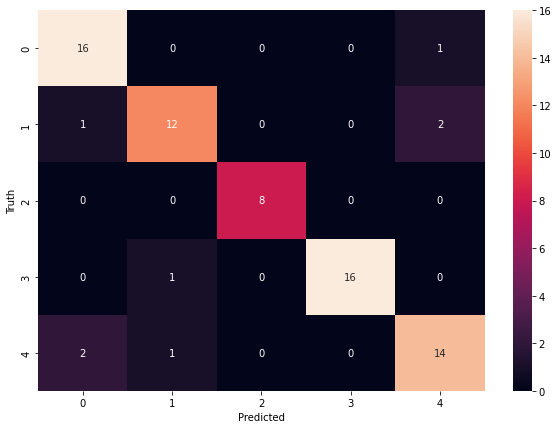

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#for james harden, it predicted it with no mistake probably cause he is black and other are white....cena too,.....them....the prob is lonel messi and Adele   also cena and conor

In [49]:
class_dict

{'Adele': 0,
 'Conor_Mcgregor': 1,
 'James _Harden': 2,
 'John_Cena': 3,
 'Lionel_Messi': 4}

In [51]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [52]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))